In [1]:
#mathematical calculation and statistical imputation
import pandas as pd
import numpy as np
#Visualisation
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
#label encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#training _testing conversion
from sklearn.model_selection import train_test_split
# dimension reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#Multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
#model building and Metrics for model evaluation
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble, linear_model, neural_network
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#model saving
import pickle
#ignore warning
import warnings
warnings.filterwarnings("ignore")


mushrooms = pd.read_csv('E:/iNueron/Mashrum/mushrooms.csv')

#displaying top 5 rows of Dataframe
mushrooms.head(5)

#Description of Data
mushrooms.describe()

#Detailed info of Data
mushrooms.info()






#checking null values
mushrooms.isnull().sum()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [11]:
#finding unqiue values in all columns
for col in list(mushrooms):
    print(col)
    print(mushrooms[col].unique())

#label encoding
le=LabelEncoder()
for i in mushrooms.columns:
    mushrooms[i]=le.fit_transform(mushrooms[i])


class
[1 0]
cap-shape
[5 0 4 2 3 1]
cap-surface
[2 3 0 1]
cap-color
[4 9 8 3 2 5 0 7 1 6]
bruises
[1 0]
odor
[6 0 3 5 2 1 8 7 4]
gill-attachment
[1 0]
gill-spacing
[0 1]
gill-size
[1 0]
gill-color
[ 4  5  2  7 10  3  9  1  0  8 11  6]
stalk-shape
[0 1]
stalk-root
[3 2 1 4 0]
stalk-surface-above-ring
[2 0 1 3]
stalk-surface-below-ring
[2 0 3 1]
stalk-color-above-ring
[7 3 6 4 0 2 5 1 8]
stalk-color-below-ring
[7 6 3 0 4 2 8 5 1]
veil-type
[0]
veil-color
[2 0 1 3]
ring-number
[1 2 0]
ring-type
[4 0 2 1 3]
spore-print-color
[2 3 6 1 7 5 4 8 0]
population
[3 2 0 4 5 1]
habitat
[5 1 3 0 4 6 2]


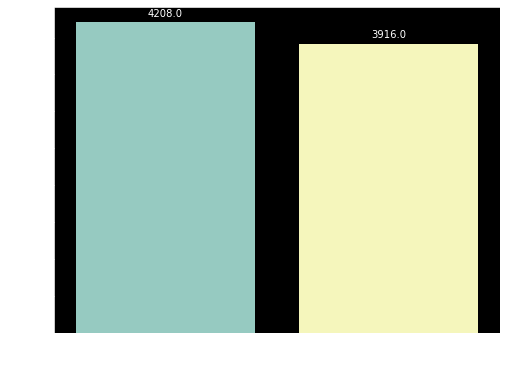

In [3]:
#Step 3: Exploratory Data Analysis
#1.Visualising the number of mushrooms that fall in each class - p = poisonous, e=edible
plt.figure(figsize=(8,6))
plt.style.use('dark_background')
s = sns.countplot(x = 'class',data = mushrooms)
for p in s.patches:
    s.annotate(format(p.get_height(), '.1f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.show()



In [4]:
#As per above plot, we have 3916 as poisounous and 4208 are edibles mushrooms. from above observation data is slightly balanced and so no imbalance in dataset.


Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


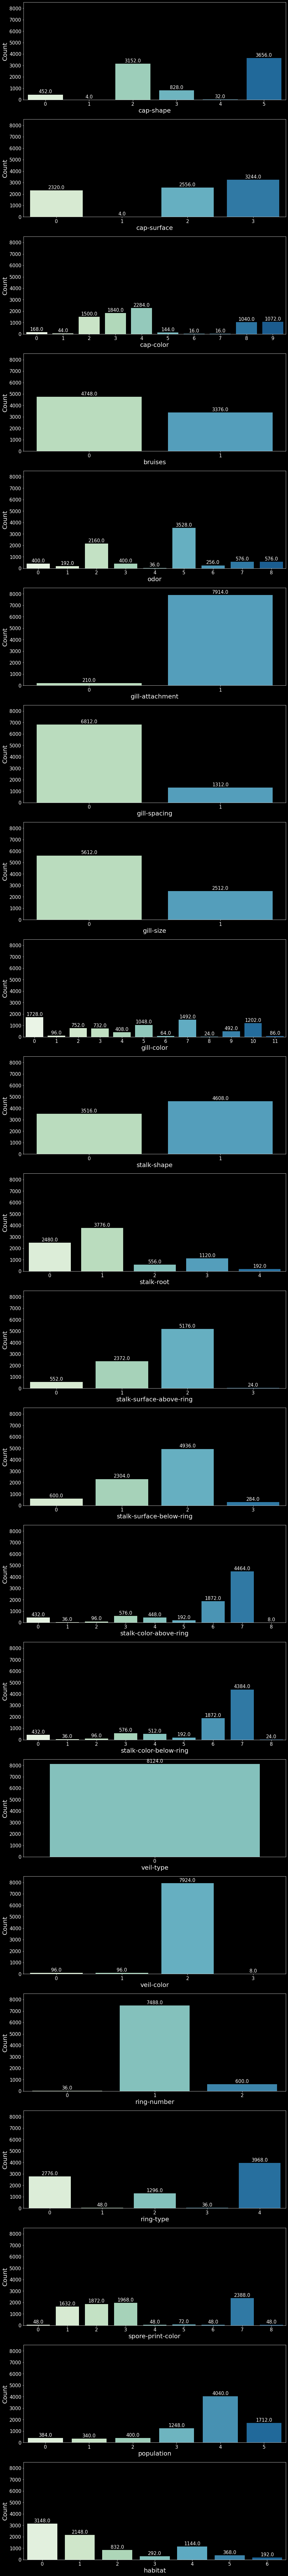

In [6]:
# 2. Univariate Analysis: Visualizing Countplot for all Independent features
features = mushrooms.columns
print(features)
# Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
#        'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
#        'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
#        'stalk-surface-below-ring', 'stalk-color-above-ring',
#        'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
#        'ring-type', 'spore-print-color', 'population', 'habitat'],
#       dtype='object')
f, axes = plt.subplots(22,1, figsize=(15,150), sharey = True)
k = 1
for i in range(0,22):
    s = sns.countplot(x = features[k], data = mushrooms, ax=axes[i], palette = 'GnBu')
    axes[i].set_xlabel(features[k], fontsize=20)
    axes[i].set_ylabel("Count", fontsize=20)
    axes[i].tick_params(labelsize=15)
    k = k+1
    for p in s.patches:
        s.annotate(format(p.get_height(), '.1f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center', va = 'center',
                   xytext = (0, 9),
        fontsize = 15,
        textcoords = 'offset points')

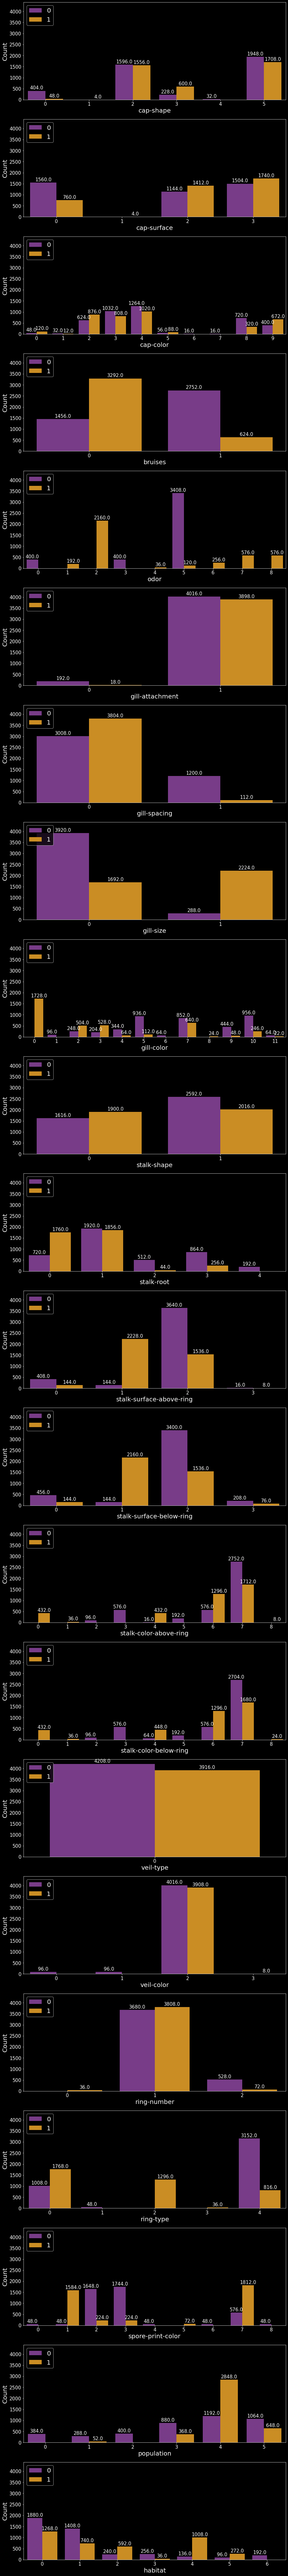

In [7]:
# 3. Bivariate Analysis: Visualising of columns categories with target column.
f, axes = plt.subplots(22,1, figsize=(15,150), sharey = True)
k = 1
for i in range(0,22):
    s = sns.countplot(x = features[k], data = mushrooms, hue = 'class', ax=axes[i], palette = 'CMRmap')
    axes[i].set_xlabel(features[k], fontsize=20)
    axes[i].set_ylabel("Count", fontsize=20)
    axes[i].tick_params(labelsize=15)
    axes[i].legend(loc=2, prop={'size': 20})
    k = k+1
    for p in s.patches:
        s.annotate(format(p.get_height(), '.1f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center', va = 'center',
        xytext = (0, 9),
        fontsize = 15,
        textcoords = 'offset points')

<AxesSubplot:>

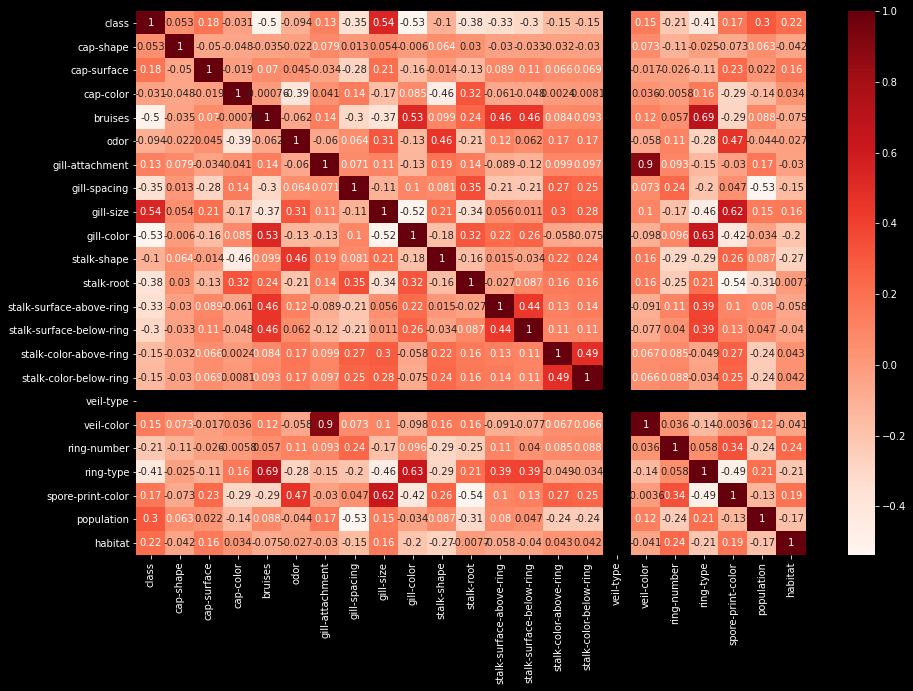

In [8]:
#plotting correltion plot
plt.figure(figsize=(15,10))
sns.heatmap(mushrooms.corr(), cmap='Reds',annot=True)




In [9]:
# From above correlation Heatmap we observed that -
# 1.Feature namely veil-type having only one category i.e partial(p)
#
# 2.veil-color and gill-attachment has highly correlated feature combination more than 80%. So we will drop one variable.
#
# Feature namely veil-type having only one category i.e partial(p) so we will drop as its not important for our prediction
#
# This is another way of checking the multicollinearity i.e. VIF. This will return us the extent to which
# multicollinearity is increased.


In [10]:
# function for VIF
def calc_VIF(mushrooms):
    vif = pd.DataFrame()
    vif['Variables'] = mushrooms.columns
    vif['VIF'] = [variance_inflation_factor(mushrooms.values, i) for i in range(mushrooms.shape[1])]

    return (vif)

calc_VIF(mushrooms)


,Variables,VIF
0,class,7.320778
1,cap-shape,5.464170
2,cap-surface,3.970695
3,cap-color,5.958756
4,bruises,9.277313
5,odor,9.052766
6,gill-attachment,256.849199
7,gill-spacing,5.241245
8,gill-size,7.062200
9,gill-color,6.308226
